<a href="https://colab.research.google.com/github/Shristi2919/C-Users-KIIT-Documents-website-index.html/blob/main/NIHClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all the required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [ ]:
# importing the file with the combined data of both the hospitals and splitting it into 2 parts

combined = pd.read_csv('Dataset.csv')

rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) == 6)]
df_train = combined.drop(rows_to_drop.index)
df_train.to_csv('data_part1.csv', index=False)

rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) != 6)]
df_test = combined.drop(rows_to_drop.index)
df_test.to_csv('data_part2.csv', index=False)

In [ ]:
df_train.head(15)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1.0,0.0,17072.0
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2.0,0.0,17072.0
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3.0,0.0,17072.0
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4.0,0.0,17072.0
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5.0,0.0,17072.0
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,6.0,0.0,17072.0
6,6,6,61.0,100.0,NaN,101.0,75.0,58.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,7.0,0.0,17072.0
7,7,7,68.0,100.0,35.78,142.0,93.5,78.0,16.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,8.0,0.0,17072.0
8,8,8,71.0,100.0,NaN,121.0,74.0,91.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,9.0,0.0,17072.0
9,9,9,69.0,100.0,NaN,120.0,79.0,98.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,10.0,0.0,17072.0


In [ ]:
# let's list down all the different columns

df_train.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [ ]:
# list of all the unique patients
# total number of patients present in the dataset

patients = list(df_test['Patient_ID'].unique())
len(patients)

3407

In [ ]:
# Function to draw correlation heat map

def corr_matrix(df):
  corr = df.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  f, ax = plt.subplots(figsize=(40,40))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap="Paired", vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Percentage of null values present in all the parameters

null_values = df_train.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

,0
EtCO2,100.000000
TroponinI,99.850038
Bilirubin_direct,99.843250
Fibrinogen,99.182923
Bilirubin_total,98.739208
Alkalinephos,98.490505
AST,98.455946
Lactate,96.650230
PTT,95.146907
SaO2,95.128393


In [ ]:
# the features have been removed based on the number of null values and redundancy

# 'Unnamed: 0'-- this is the index column
# 'SBP' -- MAP is considered instead of SBP and DBP
# 'DBP' -- MAP is considered instead of SBP and DBP
# 'EtCO2' -- It is not readily. available and also not available in the dataset
# 'BaseExcess' -- It is an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'HCO3' -- It is also an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'pH' -- It is also an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'PaCO2' -- It is an indicator of respiratory health of an individual, we are considering SaO2 and FiO2 which are more readily avaiilable
# 'Alkalinephos' -- It is an indicator of the health of the liver of an individual, but we are considering Bilirubin instead of this, as data of this is more scarce.
# 'Calcium' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'Magnesium' -- It is an indicator of metabolism and kidney health, but we are considering Lactate instead as it is more readily available
# 'Phosphate' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'Potassium' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'PTT' -- It is used to check inflammation. We are using WBC counts instead as it is easy to obtain.
# 'Fibrinogen' -- It is used to check blood clotting ability. We are using Platelets instead, as it is easier to obtain.
# 'Unit1' -- Both the columns Unit1 and Unit2 have been merged to form a single column.
# 'Unit2' -- Both the columns Unit1 and Unit2 have been merged to form a single column.

columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
df_train = df_train.assign(Unit=df_train['Unit1'] + df_train['Unit2'])
df_train_mod = df_train.drop(columns=columns_drop)
df_train_mod.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID', 'Unit'],
      dtype='object')

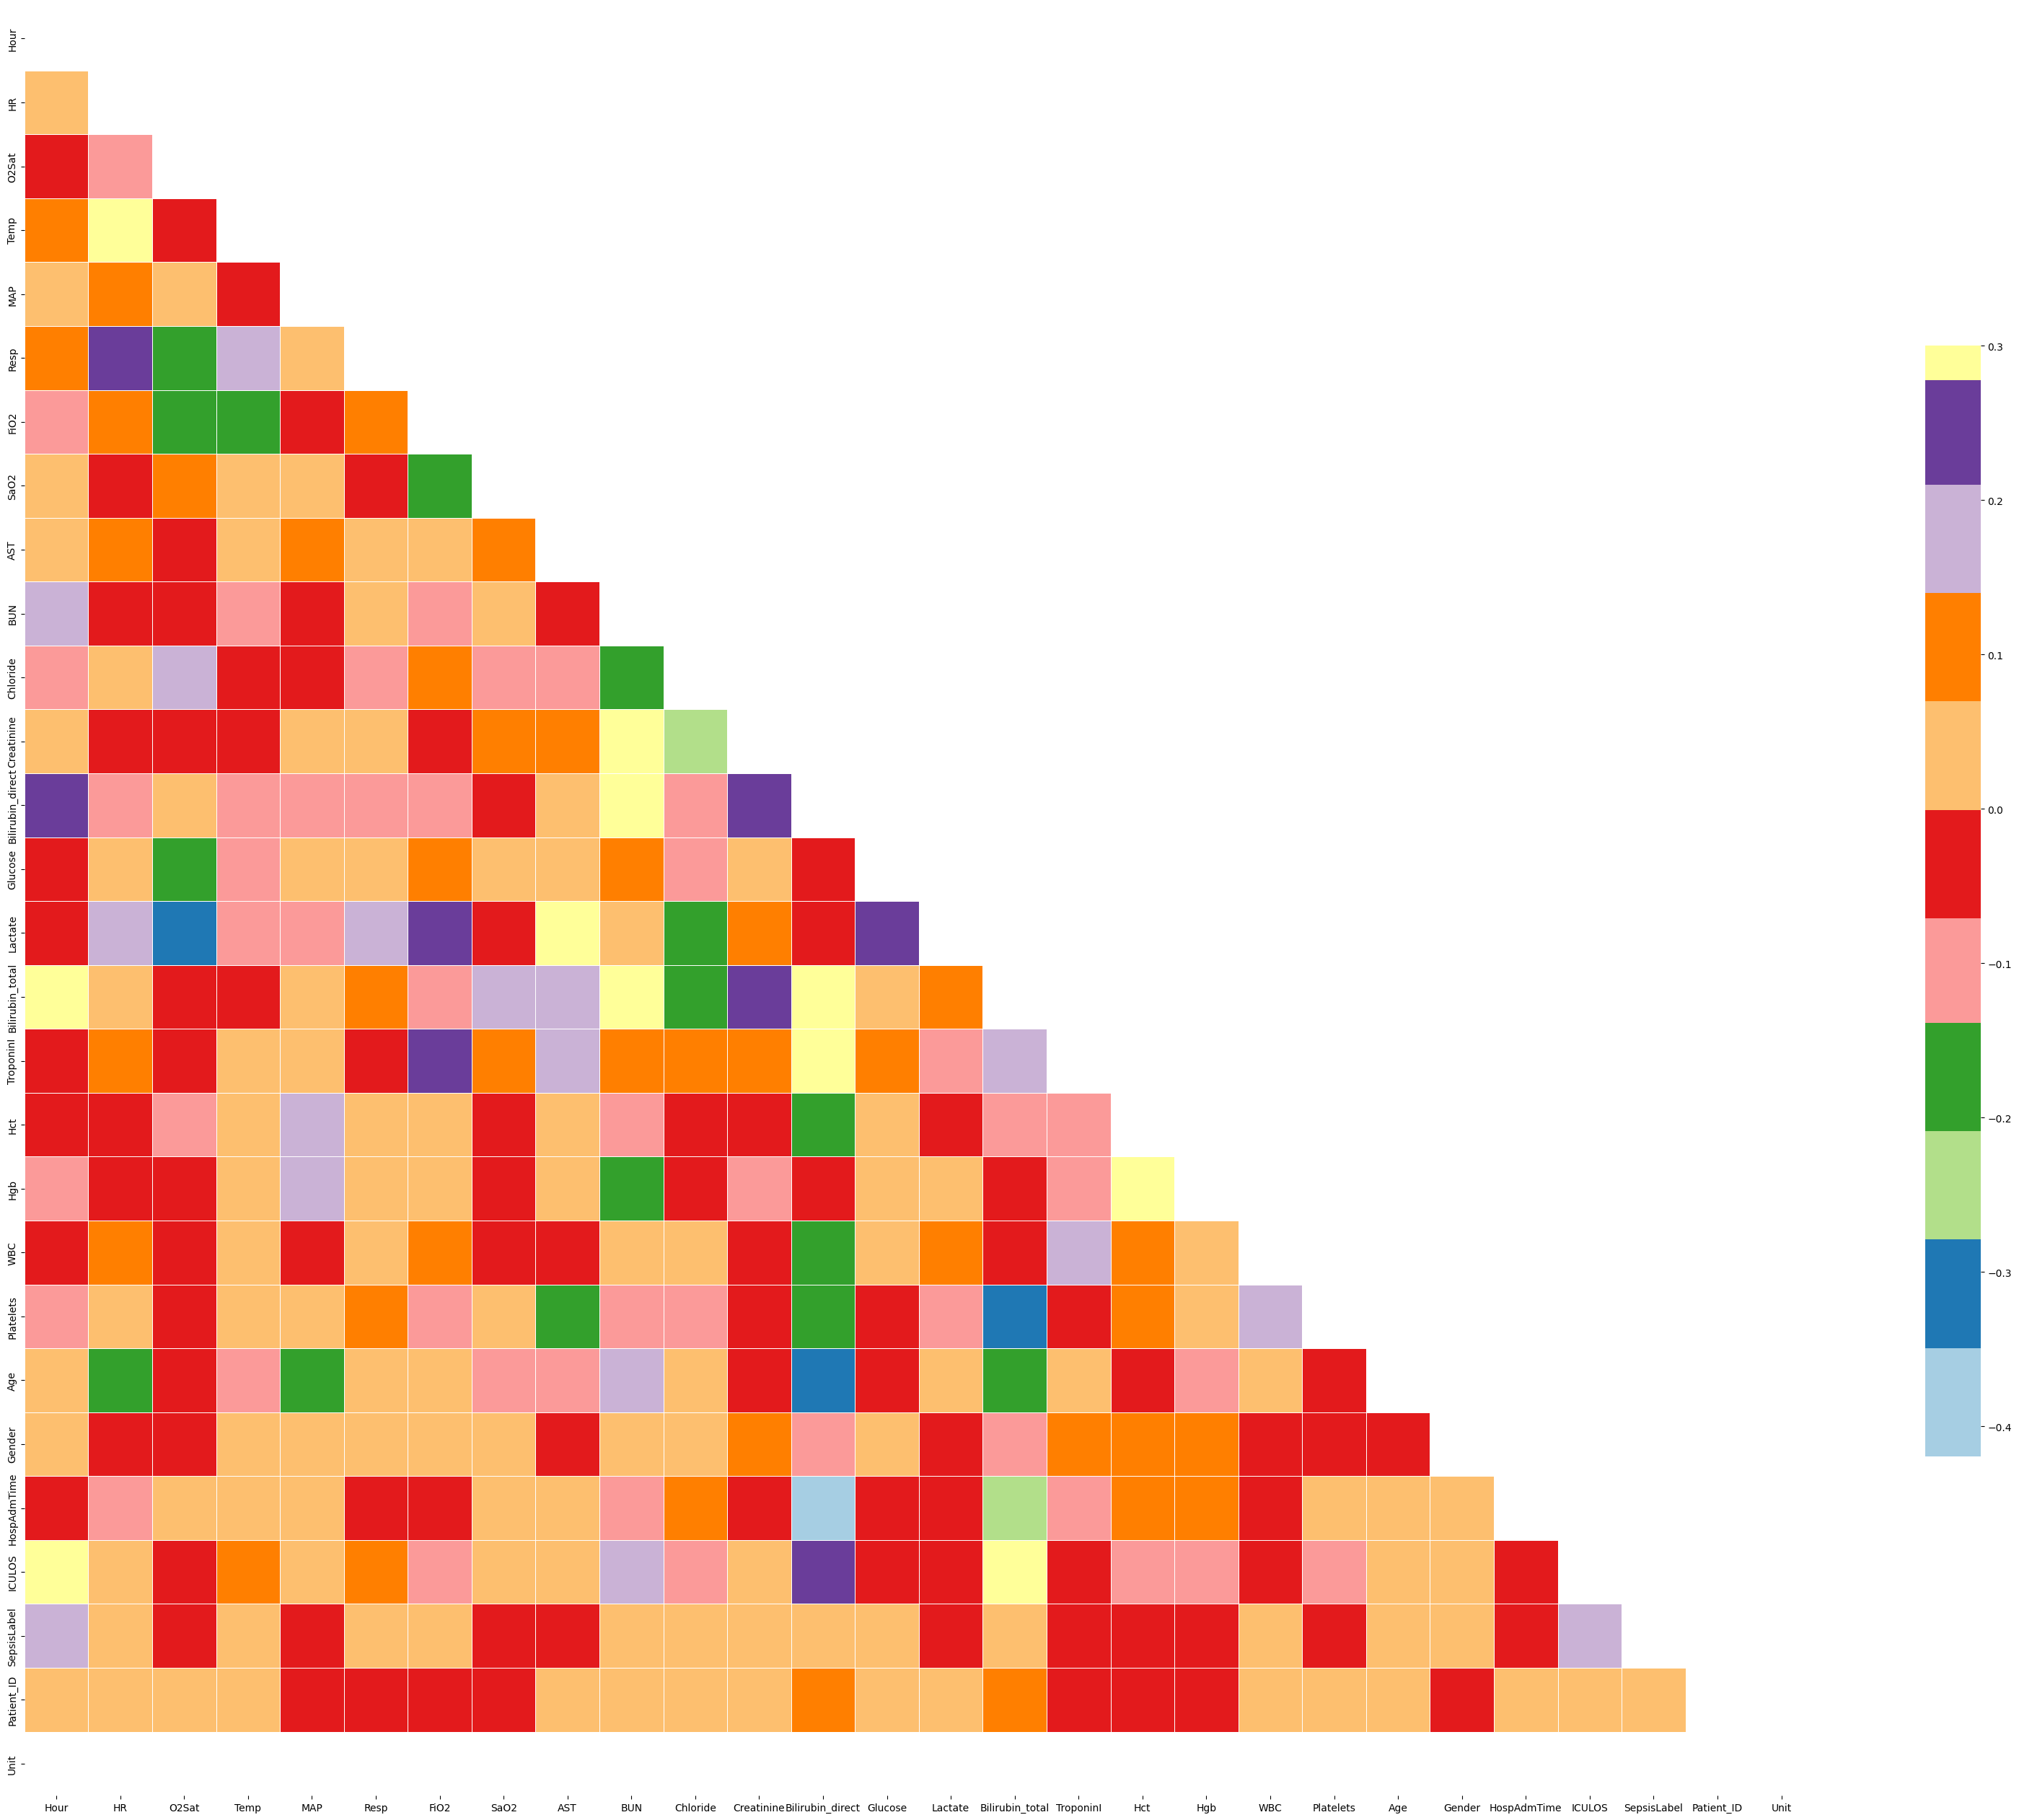

In [ ]:
# correlation matrix to check if there is high correlation between the remaining features

corr_matrix(df_train_mod)

In [ ]:
df_train_impute = df_train_mod.copy()
columns_impute = list(df_train_impute.columns)

In [ ]:
# bfill and ffill for imputing

grouped_by_patient = df_train_impute.groupby('Patient_ID')
df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())

<ipython-input-16-630336680b91>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())


In [ ]:
df_train_impute.head()

Hour     HR  O2Sat   Temp    MAP  Resp  FiO2  SaO2   AST  \
Patient_ID                                                                   
1.0        72964     0   97.0   95.0  36.11  75.33  19.0  0.28  88.0  16.0   
           72965     1   97.0   95.0  36.11  75.33  19.0  0.28  88.0  16.0   
           72966     2   89.0   99.0  36.11  86.00  22.0  0.28  88.0  16.0   
           72967     3   90.0   95.0  36.11  91.33  30.0  0.28  88.0  16.0   
           72968     4  103.0   88.5  36.11  91.33  24.5  0.28  88.0  16.0   

                   BUN  ...   Hgb  WBC  Platelets    Age  Gender  HospAdmTime  \
Patient_ID              ...                                                     
1.0        72964  14.0  ...  12.5  5.7      317.0  83.14       0        -0.03   
           72965  14.0  ...  12.5  5.7      317.0  83.14       0        -0.03   
           72966  14.0  ...  12.5  5.7      317.0  83.14       0        -0.03   
           72967  14.0  ...  12.5  5.7      317.0  83.14       0        -0.03   
           72968  14.0  ...  12.5  5.7      317.0  83.14       0        -0.03   

                  ICULOS  SepsisLabel  Patient_ID  Unit  
Patient_ID                                               
1.0        72964     1.0          0.0         1.0   NaN  
           72965     2.0          0.0         1.0   NaN  
           72966     3.0          0.0         1.0   NaN  
           72967     4.0          0.0         1.0   NaN  
           72968     5.0          0.0         1.0   NaN  

[5 rows x 28 columns]

In [ ]:
# Now let's check the remaining proportion of missing values

null_values = df_train_impute.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

,0
TroponinI,96.682301
Bilirubin_direct,96.020736
Bilirubin_total,67.719699
AST,67.068625
SaO2,57.670945
Lactate,56.182424
Unit,49.216243
FiO2,36.183658
WBC,1.602074
Platelets,1.386078


In [ ]:
# dropping all the columns with null values more than 25% and patient_id

null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2',
            'Unit', 'Patient_ID']
df_train_impute = df_train_impute.drop(columns=null_col)
df_train_impute.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [ ]:
# onehot encoding the gender

one_hot = pd.get_dummies(df_train_impute['Gender'])
df_train_impute = df_train_impute.join(one_hot)
df_train_impute = df_train_impute.drop('Gender', axis=1)


In [ ]:
# function to draw histogram and QQ plot

def diagnostic_plots(df, variable):
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(121)
    df[variable].hist(bins=30)
    ax = fig.add_subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.xlabel(variable)
    plt.show()

In [ ]:
# function to apply different transformations to make the plot gaussian

def try_gaussian(df, col):
  print('actual plot')
  diagnostic_plots(df,col)
  # this applies yeojohnson plot
  df['col_yj'], param = stats.yeojohnson(df[col])
  print('yeojohnson plot')
  diagnostic_plots(df, 'col_yj')
  # this applies exponential transformation
  df['col_1.5'] = df[col]**(1/1.5)
  print('**1/1.5 plot')
  diagnostic_plots(df, 'col_1.5')
  df['col_.5'] = df[col]**(.5)
  print('**.5 plot')
  # this applies inverse transformation
  diagnostic_plots(df, 'col_.5')
  df['col_rec'] = 1 / (df[col]+0.00001)
  diagnostic_plots(df, 'col_rec')
  # this applies logarithmic trasnformation
  df['col_log'] = np.log(df[col]+1)
  diagnostic_plots(df, 'col_log')

O2Sat
actual plot


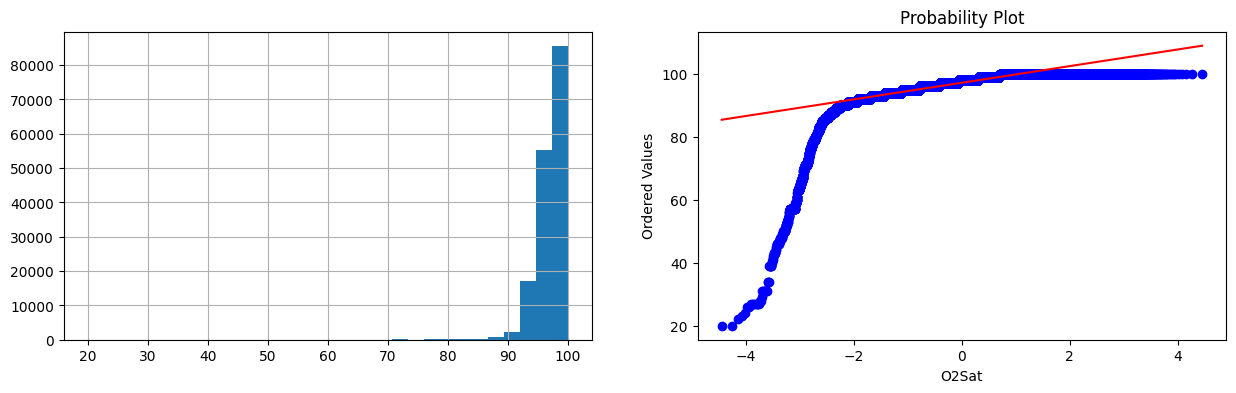

yeojohnson plot


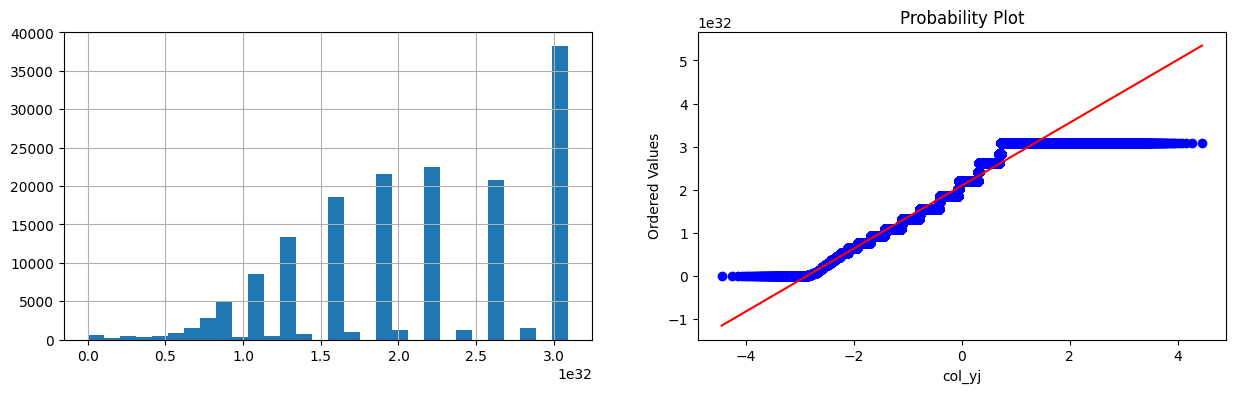

**1/1.5 plot


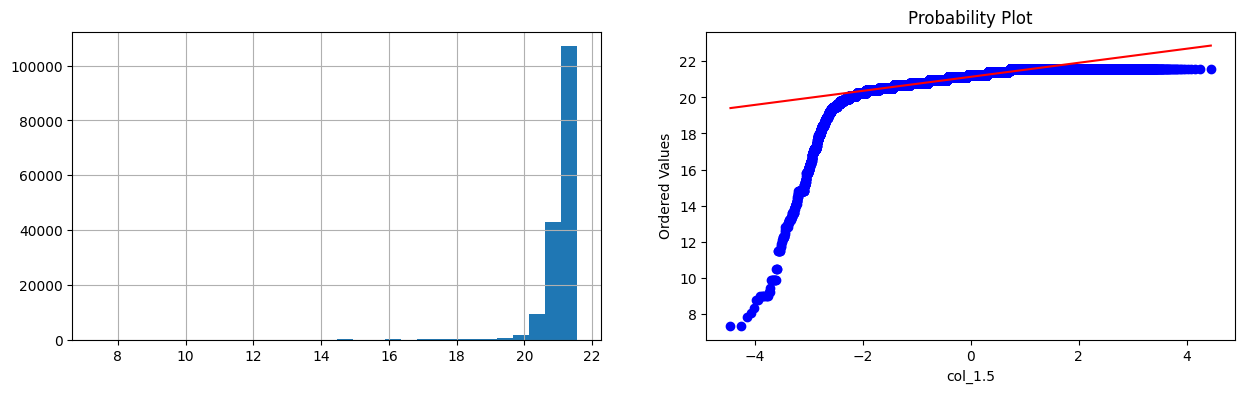

**.5 plot


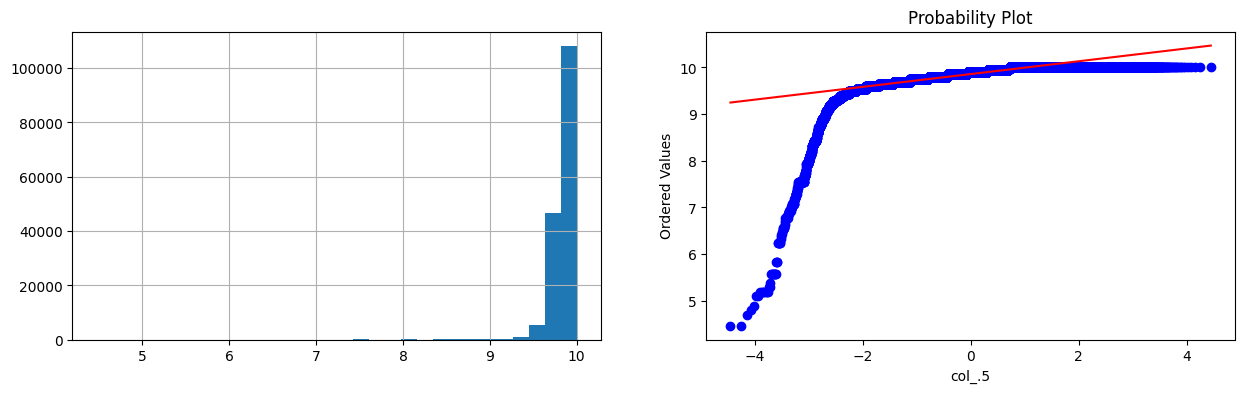

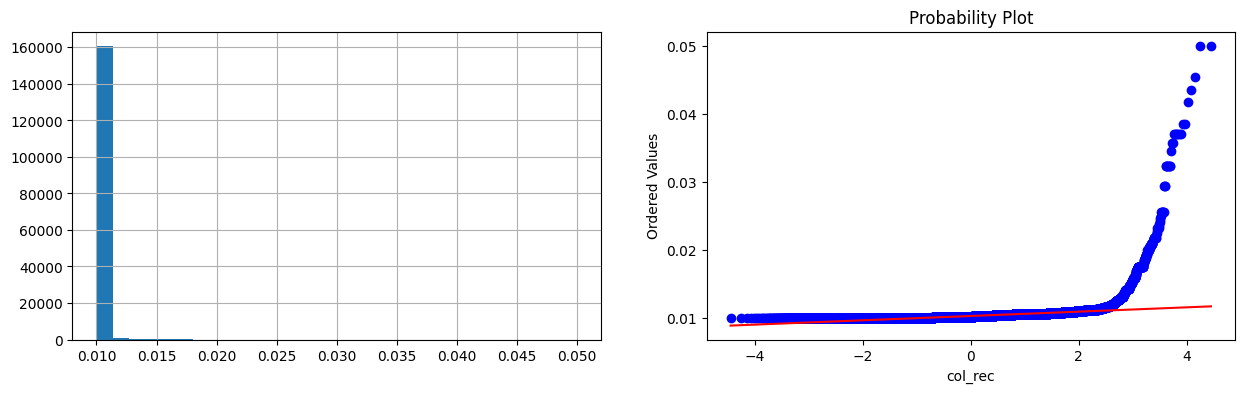

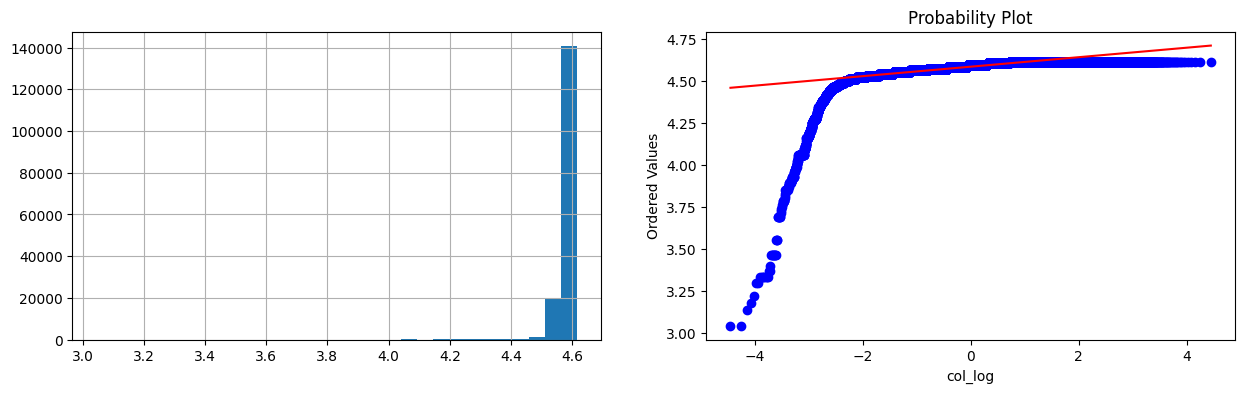

Temp
actual plot


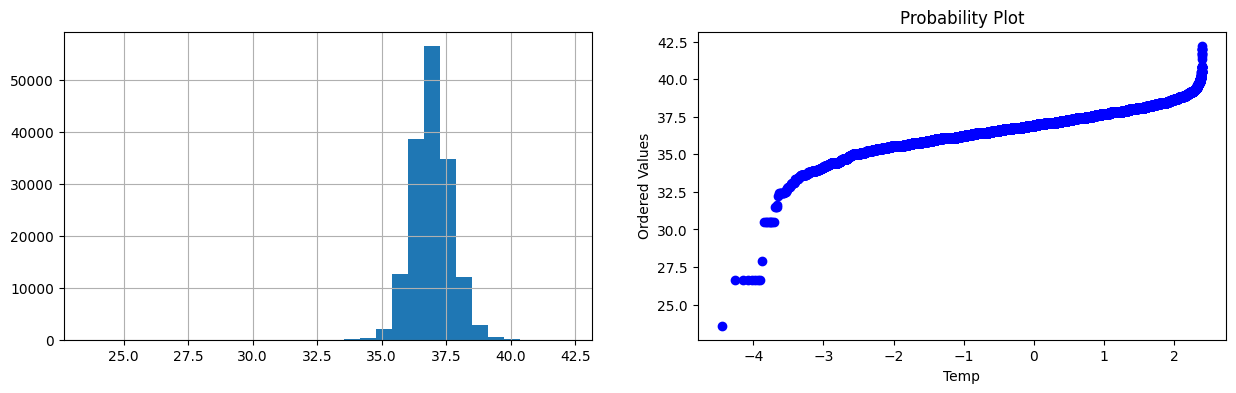

ValueError: Yeo-Johnson input must be finite.

In [ ]:
# try normal distribution
# Now we try to check the distribution of values present in different columns after application of various transformations

lst = ['O2Sat', 'Temp', 'MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in lst:
  print(i)
  try_gaussian(df_train_impute, i)

In [ ]:
# after application of the above code, some redundant columns got added to the dataframe, which are removed through this line of code

df_train_impute = df_train_impute.drop(columns = ['col_yj','col_1.5','col_.5','col_rec','col_log'])

In [ ]:
df_train_impute.head()

Hour     HR  O2Sat   Temp    MAP  Resp   BUN  Chloride  \
Patient_ID                                                                 
1.0        72964     0   97.0   95.0  36.11  75.33  19.0  14.0      85.0   
           72965     1   97.0   95.0  36.11  75.33  19.0  14.0      85.0   
           72966     2   89.0   99.0  36.11  86.00  22.0  14.0      85.0   
           72967     3   90.0   95.0  36.11  91.33  30.0  14.0      85.0   
           72968     4  103.0   88.5  36.11  91.33  24.5  14.0      85.0   

                  Creatinine  Glucose   Hct   Hgb  WBC  Platelets    Age  \
Patient_ID                                                                 
1.0        72964         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           72965         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           72966         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           72967         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           72968         0.7    193.0  37.2  12.5  5.7      317.0  83.14   

                  HospAdmTime  ICULOS  SepsisLabel     0      1  
Patient_ID                                                       
1.0        72964        -0.03     1.0          0.0  True  False  
           72965        -0.03     2.0          0.0  True  False  
           72966        -0.03     3.0          0.0  True  False  
           72967        -0.03     4.0          0.0  True  False  
           72968        -0.03     5.0          0.0  True  False

In [ ]:
# by oserving different plots, it can be concluded that only log was somewhat effective and that too for MAP, BUN, Creatinine, Glucose, WBC & Plateletes
# therefore applying log transformations on the above columns

columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in columns_normalized:
  df_train_impute[i] = np.log(df_train_impute[i]+1)

In [ ]:
df_train_impute.head()

Hour     HR  O2Sat   Temp       MAP  Resp      BUN  \
Patient_ID                                                             
1.0        72964     0   97.0   95.0  36.11  4.335066  19.0  2.70805   
           72965     1   97.0   95.0  36.11  4.335066  19.0  2.70805   
           72966     2   89.0   99.0  36.11  4.465908  22.0  2.70805   
           72967     3   90.0   95.0  36.11  4.525369  30.0  2.70805   
           72968     4  103.0   88.5  36.11  4.525369  24.5  2.70805   

                  Chloride  Creatinine   Glucose  ...  HospAdmTime  ICULOS  \
Patient_ID                                        ...                        
1.0        72964      85.0    0.530628  5.267858  ...        -0.03     1.0   
           72965      85.0    0.530628  5.267858  ...        -0.03     2.0   
           72966      85.0    0.530628  5.267858  ...        -0.03     3.0   
           72967      85.0    0.530628  5.267858  ...        -0.03     4.0   
           72968      85.0    0.530628  5.267858  ...        -0.03     5.0   

                  SepsisLabel     0      1        col_yj    col_1.5    col_.5  \
Patient_ID                                                                      
1.0        72964          0.0  True  False  1.315617e+32  20.820080  9.746794   
           72965          0.0  True  False  1.315617e+32  20.820080  9.746794   
           72966          0.0  True  False  2.614304e+32  21.400477  9.949874   
           72967          0.0  True  False  1.315617e+32  20.820080  9.746794   
           72968          0.0  True  False  4.045217e+31  19.859220  9.407444   

                   col_rec   col_log  
Patient_ID                            
1.0        72964  0.010526  4.564348  
           72965  0.010526  4.564348  
           72966  0.010101  4.605170  
           72967  0.010526  4.564348  
           72968  0.011299  4.494239  

[5 rows x 25 columns]

In [ ]:
# standard normalization

scaler = StandardScaler()
df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
df_train_impute.head()

Hour        HR     O2Sat      Temp       MAP      Resp  \
Patient_ID                                                                 
1.0        72964     0  0.709202 -0.676060 -1.105348 -0.156618  0.064794   
           72965     1  0.709202 -0.676060 -1.105348 -0.156618  0.064794   
           72966     2  0.239528  0.564600 -1.105348  0.554004  0.628139   
           72967     3  0.298237 -0.676060 -1.105348  0.876945  2.130390   
           72968     4  1.061457 -2.692132 -1.105348  0.876945  1.097592   

                       BUN  Chloride  Creatinine   Glucose  ...  HospAdmTime  \
Patient_ID                                                  ...                
1.0        72964 -0.430976 -3.609278   -0.572524  1.457635  ...        -0.03   
           72965 -0.430976 -3.609278   -0.572524  1.457635  ...        -0.03   
           72966 -0.430976 -3.609278   -0.572524  1.457635  ...        -0.03   
           72967 -0.430976 -3.609278   -0.572524  1.457635  ...        -0.03   
           72968 -0.430976 -3.609278   -0.572524  1.457635  ...        -0.03   

                  ICULOS  SepsisLabel     0      1        col_yj    col_1.5  \
Patient_ID                                                                    
1.0        72964     1.0          0.0  True  False  1.315617e+32  20.820080   
           72965     2.0          0.0  True  False  1.315617e+32  20.820080   
           72966     3.0          0.0  True  False  2.614304e+32  21.400477   
           72967     4.0          0.0  True  False  1.315617e+32  20.820080   
           72968     5.0          0.0  True  False  4.045217e+31  19.859220   

                    col_.5   col_rec   col_log  
Patient_ID                                      
1.0        72964  9.746794  0.010526  4.564348  
           72965  9.746794  0.010526  4.564348  
           72966  9.949874  0.010101  4.605170  
           72967  9.746794  0.010526  4.564348  
           72968  9.407444  0.011299  4.494239  

[5 rows x 25 columns]

In [ ]:
df_train_impute = df_train_impute.dropna()

In [ ]:
null_values = df_train_impute.isnull().mean()*100
null_values

,0
Hour,0.0
HR,0.0
O2Sat,0.0
Temp,0.0
MAP,0.0
Resp,0.0
BUN,0.0
Chloride,0.0
Creatinine,0.0
Glucose,0.0


In [ ]:
# this function will transform the dataframe (for final testing) in the compatible
# format for the input of the model
# this will make it easier to get the dataframe ready in a single go for prediction

def get_data_ready(df):
  columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
  'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
  df = df.assign(Unit=df['Unit1'] + df['Unit2'])
  # dropping columns based on redundancy
  df = df.drop(columns=columns_drop)
  grouped_by_patient = df.groupby('Patient_ID')
  # imputing backfill and forward fill
  df = grouped_by_patient.apply(lambda x: x.bfill().ffill())
  # dropping all the columns with null values more than 25% and patient_id
  null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2','Unit', 'Patient_ID']
  df = df.drop(columns=null_col)
  # gaussian transformation
  columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
  for i in columns_normalized:
    df[i] = np.log(df[i]+1)
  # normailizing
  scaler = StandardScaler()
  df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
  # onehot encoding the gender
  one_hot = pd.get_dummies(df['Gender'])
  df = df.join(one_hot)
  df = df.drop('Gender', axis=1)
  df = df.dropna()
  return df

In [ ]:
# this fucntion calculates different evaluation parameters of a model

def evaluate_model(y_true,y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy:", accuracy)
  precision = precision_score(y_true, y_pred)
  print("Precision:", precision)
  recall = recall_score(y_true, y_pred)
  print("Recall:", recall)
  f1 = f1_score(y_true, y_pred)
  print("F1 Score:", f1)
  auc = roc_auc_score(y_true, y_pred)
  print("AUC-ROC:", auc)
  mae = mean_absolute_error(y_true, y_pred)
  print("Mean Absolute Error:", mae)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print("Root Mean Squared Error:", rmse)
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

In [ ]:
# checking the distribution of data points between the two classes

majority_class = df_train_impute[df_train_impute['SepsisLabel'] == 0]
minority_class = df_train_impute[df_train_impute['SepsisLabel'] == 1]
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))

number of sepsis label 1 is 3176
while number of sepsis label 0 is 153903


In [ ]:
# Undersampling

majority_class_subset = majority_class.sample(n=2*len(minority_class))
df_train_impute = pd.concat([majority_class_subset, minority_class])

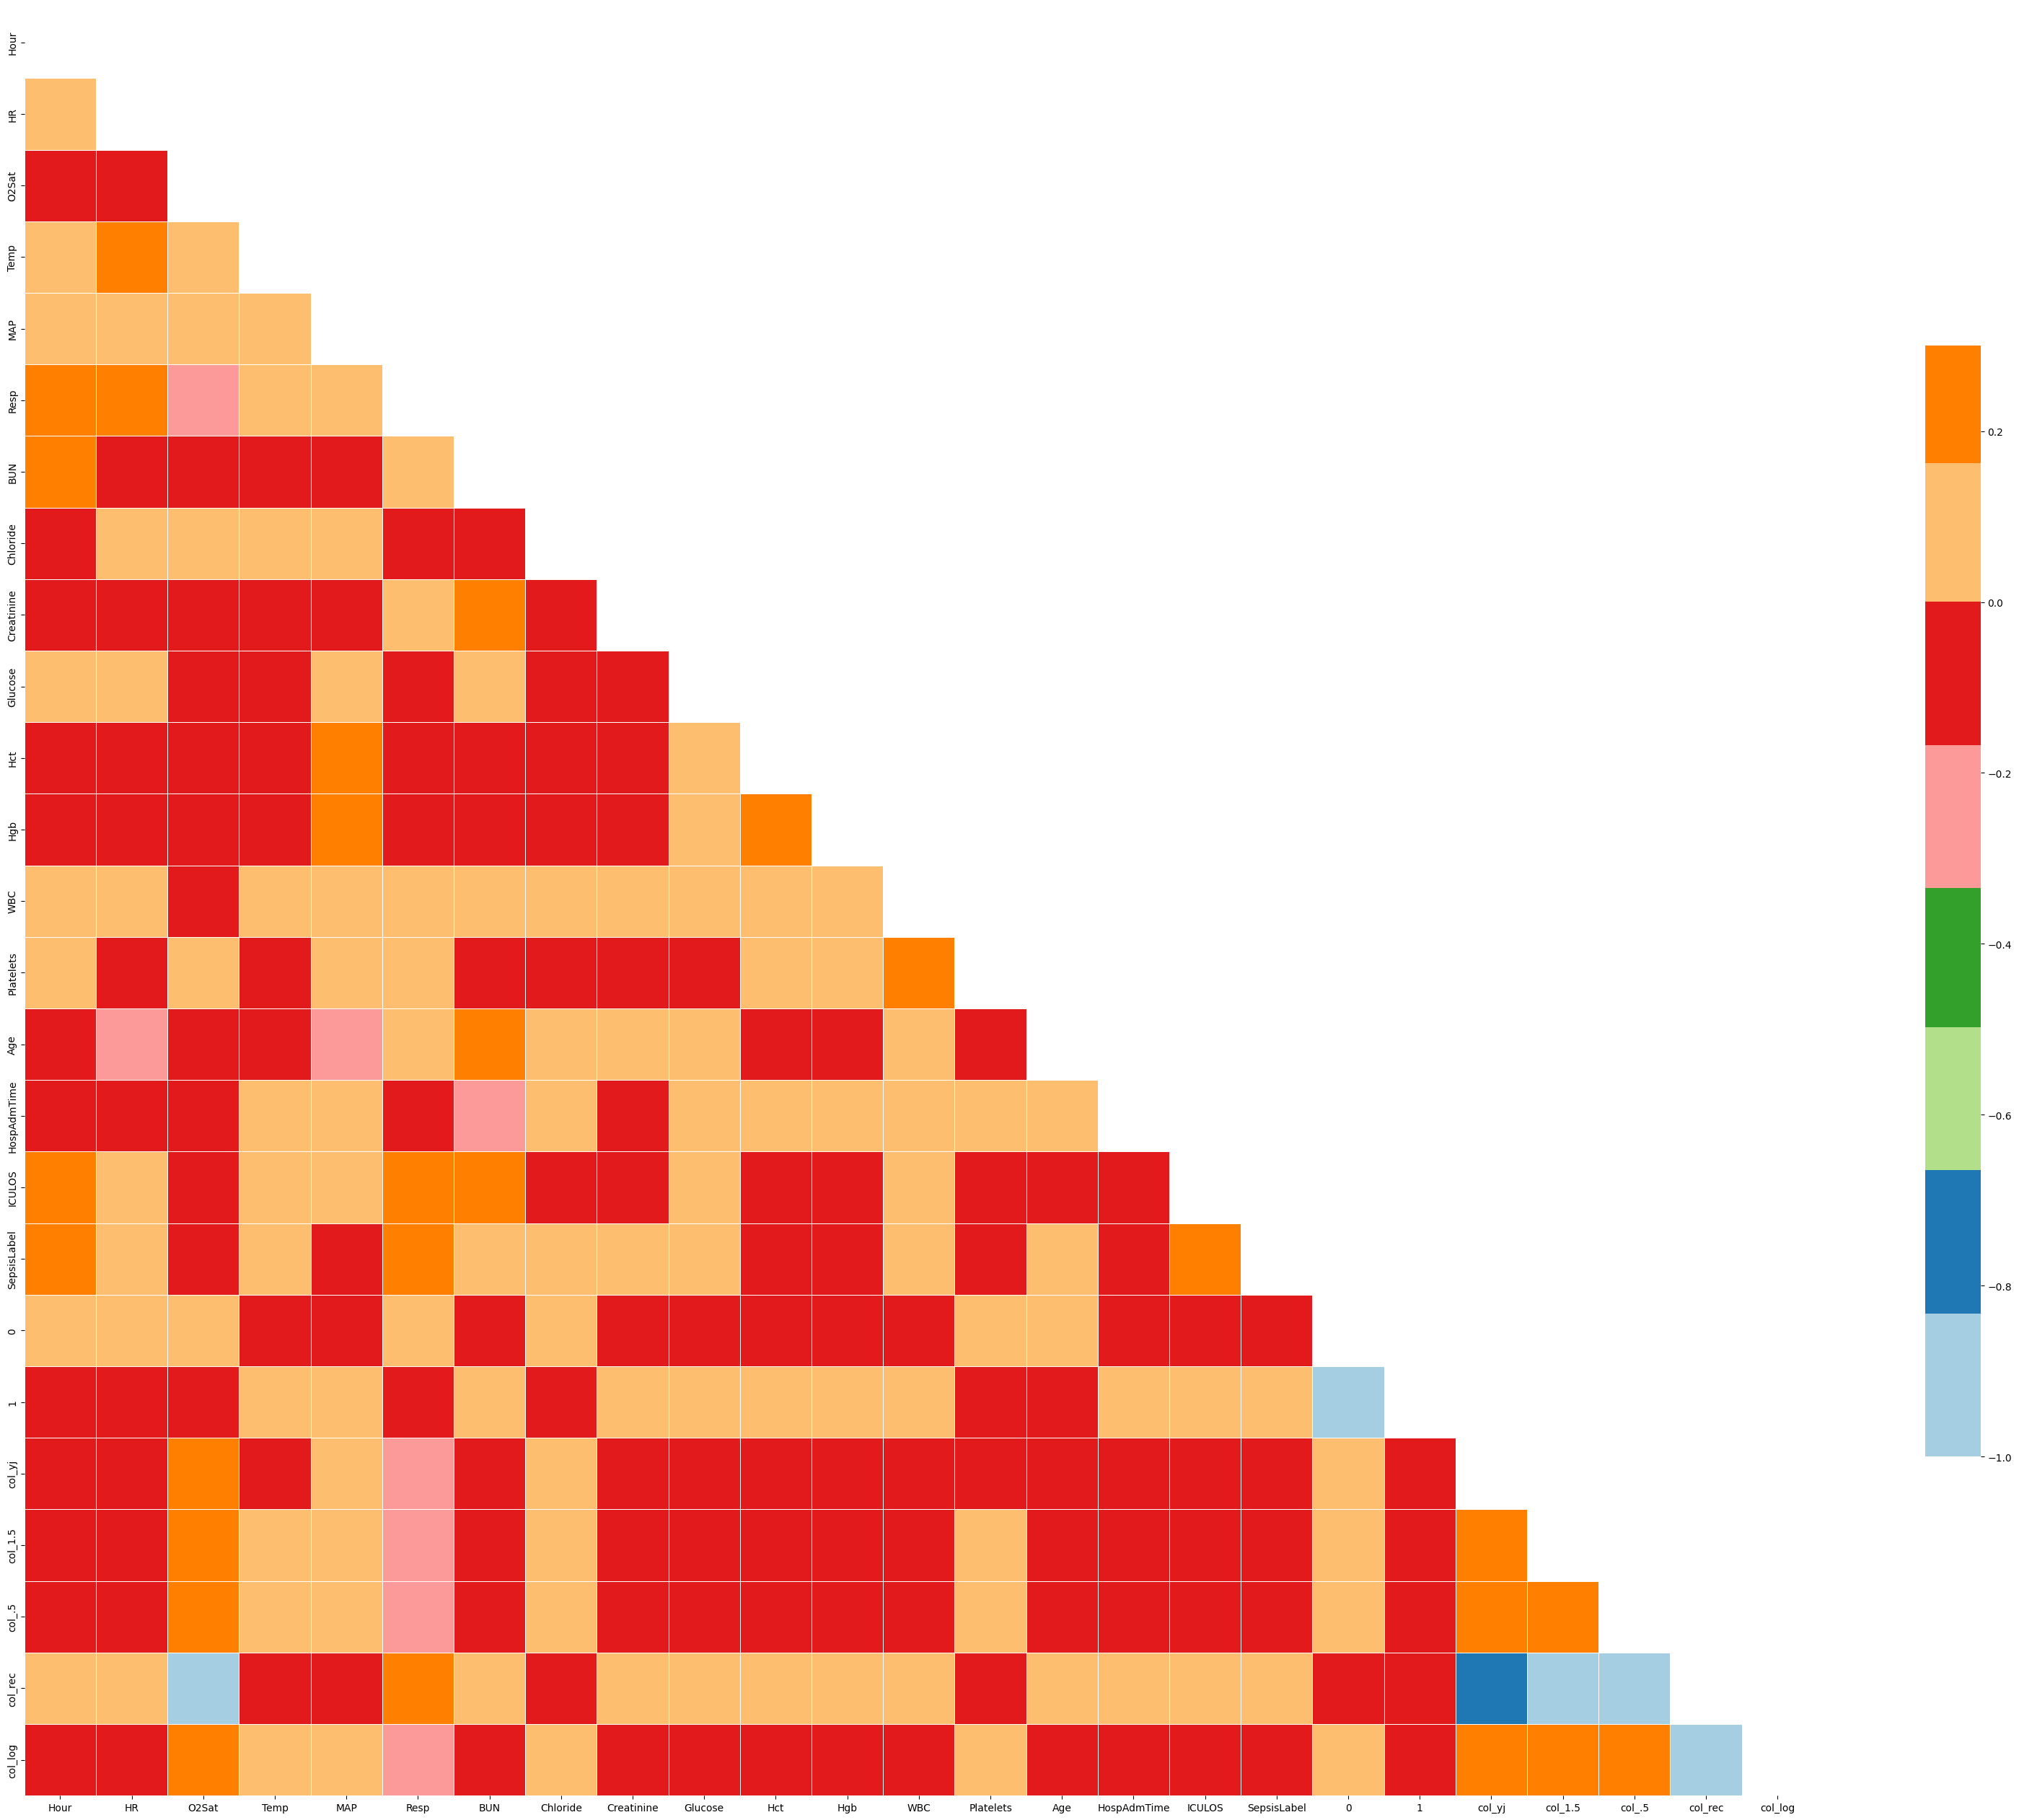

In [ ]:
corr_matrix(df_train_impute)

In [ ]:
# train test split for the imputed output
X = df_train_impute.drop('SepsisLabel', axis=1)
y = df_train_impute['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)